In [2]:
import numpy as np
import pandas as pd
#pd.set_option('max_columns', None)

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [3]:
data = pd.read_csv('MLCleanedData.csv')

In [15]:
#data.info()

In [6]:
# Select the desired columns using column indexing
df_reduced = data.iloc[:, 9:35].copy()
#df_reduced

In [7]:
# Create an instance of PCA and specify the number of components to retain
pca = PCA(n_components=2)

# Fit the PCA model to data
pca.fit(df_reduced)

# Transform the data to the new reduced dimensions
data_reduced = pca.transform(df_reduced)
data_reduced

array([[ -3.36304152, -17.0227858 ],
       [-22.36878574, -14.38066872],
       [  2.19742741, -27.04954649],
       ...,
       [ 16.81537497, -22.06986264],
       [-18.18535654,   4.42466657],
       [  7.44320165,  -7.69592248]])

In [8]:
print(len(data_reduced))

107634


In [9]:
# Set the desired number of samples
num_samples = 10000

# Get the total number of entries in data
total_entries = data_reduced.shape[0]

# Generate random indices for sampling
random_indices = np.random.choice(total_entries, size=num_samples, replace=False)

# Select the subset of data based on the random indices
data_subset = data_reduced[random_indices, :]
print(len(data_subset))


10000


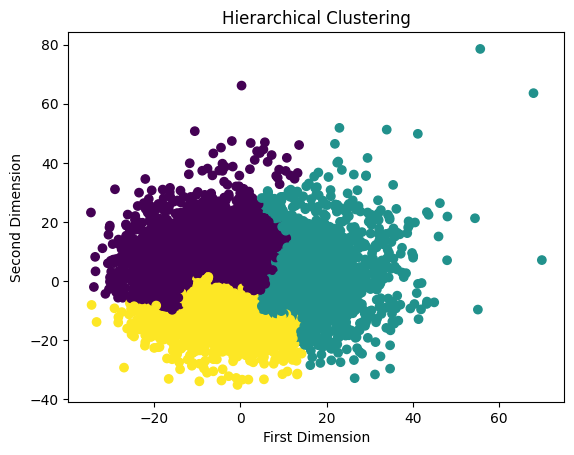

In [14]:
# Create an instance of the AgglomerativeClustering algorithm
clustering = AgglomerativeClustering(n_clusters=3)  # Adjust the number of clusters as desired

# Fit the algorithm 
clusters = clustering.fit_predict(data_subset)

# Visualize the clusters using a scatter plot
plt.scatter(data_subset[:, 0], data_subset[:, 1], c=clusters)
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Hierarchical Clustering')
plt.show()

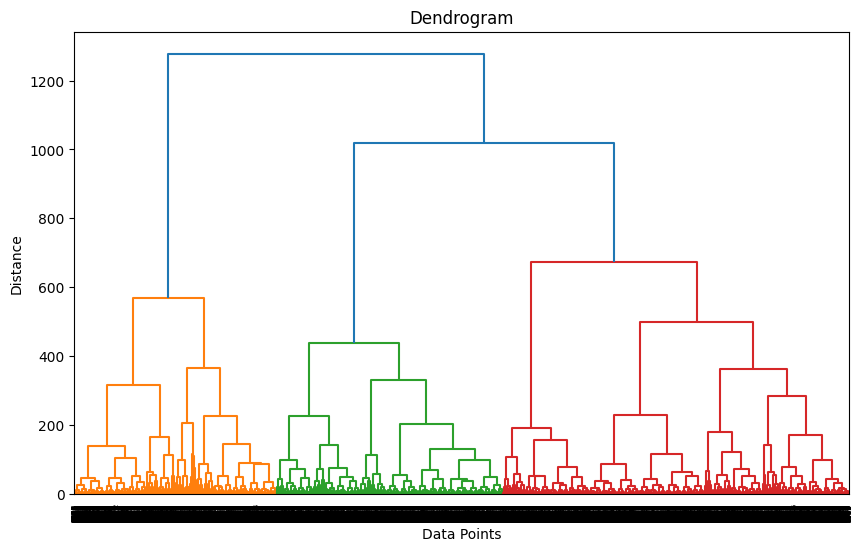

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering to obtain the linkage matrix
linkage_matrix = linkage(data_subset, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()


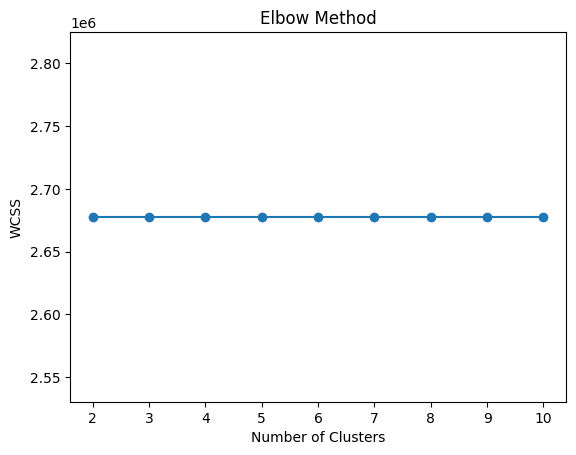

In [55]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
wcss = []
for n_clusters in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(data_subset)
    wcss.append(np.sum((data_subset - np.mean(data_subset, axis=0))**2))

# Plot the WCSS values against the number of clusters
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


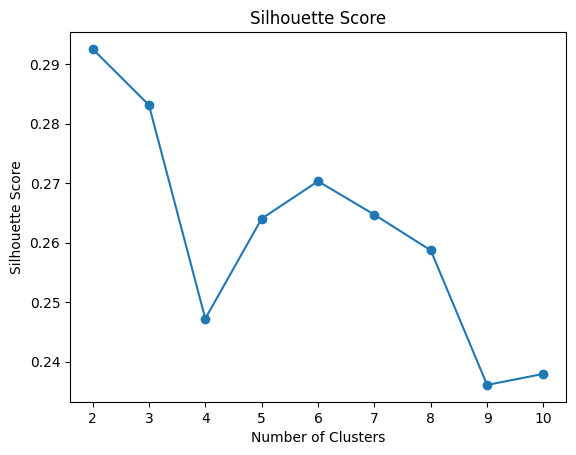

In [56]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(data_subset)
    silhouette_scores.append(silhouette_score(data_subset, clusters))

# Plot the silhouette scores against the number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()